# Dataset generalization

## For every considered model, meta-learn on 16-dimensional halfspace dataset, then transfer rules, and train / test that on MNIST.

Created by Basile Van Hoorick, Fall 2020.

In [1]:
%run FF_common.ipynb

In [2]:
# IMPORTANT: Henceforth, we use GD directly on inputs but use plasticity rules in the output and hidden layers.
opts_up = Options(gd_input=True,
                  use_graph_rule=True,
                  gd_graph_rule=True,
                  use_output_rule=True,
                  gd_output_rule=True,
                  gd_output=False)
opts_down = Options(gd_input=True,
                    use_graph_rule=True,
                    gd_graph_rule=False,  # Not meta-trainable anymore!
                    use_output_rule=True,
                    gd_output_rule=False,  # Not meta-trainable anymore!
                    gd_output=False)
# Deviates from paper (doesn't work for RNN).
scheme_ff = UpdateScheme(cross_entropy_loss=True,
                         mse_loss=False,
                         update_misclassified_only=False,
                         update_all_edges=True)  
# Same as paper (doesn't work for FF).
scheme_rnn = UpdateScheme(cross_entropy_loss=True,
                          mse_loss=False,
                          update_misclassified_only=True,
                          update_all_edges=False)

# Feed-forward brain config.
n_up = 16  # Input layer size for meta-learning.
n_down = 28 * 28  # Input layer size for desired task training.
m_up = 2  # Output layer size for meta-learning.
m_down = 10  # Output layer size for desired task training.
w = 100  # Width of hidden layers.
p = 0.5  # Connectivity probability.
cap = 50  # Number of nodes firing per layer.

# Training config.
num_runs = 5
num_rule_epochs = 70
num_epochs_upstream = 1
num_epochs_downstream = 1
downstream_backprop = True
dataset_up = 'halfspace'
dataset_down = 'mnist'

In [3]:
# Instantiate brain factories.
brain_prepost_l2_up_fact = lambda: FFLocalNet(
    n_up, m_up, 2, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_up, update_scheme=scheme_ff)
brain_prepost_l2_down_fact = lambda: FFLocalNet(
    n_down, m_down, 2, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_down, update_scheme=scheme_ff)
brain_prepost_l3_up_fact = lambda: FFLocalNet(
    n_up, m_up, 3, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_up, update_scheme=scheme_ff)
brain_prepost_l3_down_fact = lambda: FFLocalNet(
    n_down, m_down, 3, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_down, update_scheme=scheme_ff)
brain_prepost_l4_up_fact = lambda: FFLocalNet(
    n_up, m_up, 4, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_up, update_scheme=scheme_ff)
brain_prepost_l4_down_fact = lambda: FFLocalNet(
    n_down, m_down, 4, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_down, update_scheme=scheme_ff)

brain_prepostcount_l2_up_fact = lambda: FFLocalNet(
    n_up, m_up, 2, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_up, update_scheme=scheme_ff)
brain_prepostcount_l2_down_fact = lambda: FFLocalNet(
    n_down, m_down, 2, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_down, update_scheme=scheme_ff)
brain_prepostcount_l3_up_fact = lambda: FFLocalNet(
    n_up, m_up, 3, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_up, update_scheme=scheme_ff)
brain_prepostcount_l3_down_fact = lambda: FFLocalNet(
    n_down, m_down, 3, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_down, update_scheme=scheme_ff)
brain_prepostcount_l4_up_fact = lambda: FFLocalNet(
    n_up, m_up, 4, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_up, update_scheme=scheme_ff)
brain_prepostcount_l4_down_fact = lambda: FFLocalNet(
    n_down, m_down, 4, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_down, update_scheme=scheme_ff)

In [ ]:
# Evaluate models.
print('==== Interpretation: PrePost, 2 hidden layers (universal) ====')
stats_prepost_l2_up, stats_prepost_l2_down = evaluate_up_down(
    brain_prepost_l2_up_fact, brain_prepost_l2_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: PrePost, 3 hidden layers (universal) ====')
stats_prepost_l3_up, stats_prepost_l3_down = evaluate_up_down(
    brain_prepost_l3_up_fact, brain_prepost_l3_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: PrePost, 4 hidden layers (universal) ====')
stats_prepost_l4_up, stats_prepost_l4_down = evaluate_up_down(
    brain_prepost_l4_up_fact, brain_prepost_l4_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

  0%|          | 0/50 [00:00<?, ?it/s]

==== Interpretation: PrePost, 2 hidden layers (universal) ====

Run 1 / 5...
Meta-learning on halfspace...


100%|██████████| 50/50 [01:29<00:00,  1.80s/it]


Last loss: 0.5433
Last train accuracy: 0.9427
Last test accuracy: 0.9240
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


  2%|▏         | 1345/60000 [00:12<07:34, 129.05it/s]

In [ ]:
print('==== Interpretation: PrePostCount, 2 hidden layers (universal) ====')
stats_prepostcount_l2_up, stats_prepostcount_l2_down = evaluate_up_down(
    brain_prepostcount_l2_up_fact, brain_prepostcount_l2_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: PrePostCount, 3 hidden layers (universal) ====')
stats_prepostcount_l3_up, stats_prepostcount_l3_down = evaluate_up_down(
    brain_prepostcount_l3_up_fact, brain_prepostcount_l3_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: PrePostCount, 4 hidden layers (universal) ====')
stats_prepostcount_l4_up, stats_prepostcount_l4_down = evaluate_up_down(
    brain_prepostcount_l4_up_fact, brain_prepostcount_l4_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

In [ ]:
# Plot aggregated stats.
agg_stats_prepost_l2_up = convert_multi_stats_uncertainty(stats_prepost_l2_up)
agg_stats_prepost_l2_down = convert_multi_stats_uncertainty(stats_prepost_l2_down)
plot_curves(agg_stats_prepost_l2_up, agg_stats_prepost_l2_down,
            '[PrePost-L2-Uni] Upstream meta-learning on ' + dataset_up,
            '[PrePost-L2-Uni] Downstream training on ' + dataset_down,
            'figs/generalization_bp_prepost_l2_uni_' + dataset_up + '_' + dataset_down,
            no_downstream_loss=True)
agg_stats_prepost_l3_up = convert_multi_stats_uncertainty(stats_prepost_l3_up)
agg_stats_prepost_l3_down = convert_multi_stats_uncertainty(stats_prepost_l3_down)
plot_curves(agg_stats_prepost_l3_up, agg_stats_prepost_l3_down,
            '[PrePost-L3-Uni] Upstream meta-learning on ' + dataset_up,
            '[PrePost-L3-Uni] Downstream training on ' + dataset_down,
            'figs/generalization_bp_prepost_l3_uni_' + dataset_up + '_' + dataset_down,
            no_downstream_loss=True)
agg_stats_prepost_l4_up = convert_multi_stats_uncertainty(stats_prepost_l4_up)
agg_stats_prepost_l4_down = convert_multi_stats_uncertainty(stats_prepost_l4_down)
plot_curves(agg_stats_prepost_l4_up, agg_stats_prepost_l4_down,
            '[PrePost-L4-Uni] Upstream meta-learning on ' + dataset_up,
            '[PrePost-L4-Uni] Downstream training on ' + dataset_down,
            'figs/generalization_bp_prepost_l4_uni_' + dataset_up + '_' + dataset_down,
            no_downstream_loss=True)

In [ ]:
agg_stats_prepostcount_l2_up = convert_multi_stats_uncertainty(stats_prepostcount_l2_up)
agg_stats_prepostcount_l2_down = convert_multi_stats_uncertainty(stats_prepostcount_l2_down)
plot_curves(agg_stats_prepostcount_l2_up, agg_stats_prepostcount_l2_down,
            '[PrePostCount-L2-Uni] Upstream meta-learning on ' + dataset_up,
            '[PrePostCount-L2-Uni] Downstream training on ' + dataset_down,
            'figs/generalization_bp_prepostcount_l2_uni_' + dataset_up + '_' + dataset_down,
            no_downstream_loss=True)
agg_stats_prepostcount_l3_up = convert_multi_stats_uncertainty(stats_prepostcount_l3_up)
agg_stats_prepostcount_l3_down = convert_multi_stats_uncertainty(stats_prepostcount_l3_down)
plot_curves(agg_stats_prepostcount_l3_up, agg_stats_prepostcount_l3_down,
            '[PrePostCount-L3-Uni] Upstream meta-learning on ' + dataset_up,
            '[PrePostCount-L3-Uni] Downstream training on ' + dataset_down,
            'figs/generalization_bp_prepostcount_l3_uni_' + dataset_up + '_' + dataset_down,
            no_downstream_loss=True)
agg_stats_prepostcount_l4_up = convert_multi_stats_uncertainty(stats_prepostcount_l4_up)
agg_stats_prepostcount_l4_down = convert_multi_stats_uncertainty(stats_prepostcount_l4_down)
plot_curves(agg_stats_prepostcount_l4_up, agg_stats_prepostcount_l4_down,
            '[PrePostCount-L4-Uni] Upstream meta-learning on ' + dataset_up,
            '[PrePostCount-L4-Uni] Downstream training on ' + dataset_down,
            'figs/generalization_bp_prepostcount_l4_uni_' + dataset_up + '_' + dataset_down,
            no_downstream_loss=True)

## Train vanilla net

In [ ]:
# Instantiate model.
l = 3
brain_vanilla = FFBrainNet(
    n_down, m_down, l, w, p, cap, full_gd=True)

In [ ]:
# Evaluate model.
print('==== Vanilla ====')
X_train, y_train, X_test, y_test = quick_get_data('mnist', 28 * 28)
print('Training VANILLA brain instance (WITH backprop) on mnist...')
stats_vanilla = train_downstream(
    X_train, y_train, brain_vanilla, num_epochs=num_epochs_downstream,
    batch_size=100, vanilla=True, learn_rate=1e-2,
    X_test=X_test, y_test=y_test, verbose=False, stats_interval=500)

In [ ]:
# Plot aggregated stats.
plot_curves(None, stats_vanilla, None,
            '[Vanilla] Downstream training on ' + dataset_down,
            'figs/generalization_bp_vanilla_' + dataset_down,
            no_downstream_loss=True)

## Final plot

Saving figure to: figs/generalization_bp_all1_halfspace_mnist


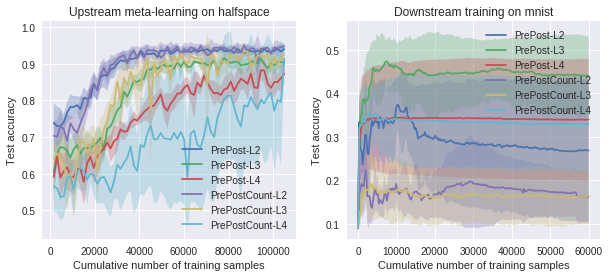

In [13]:
# Plot to compare all.
all_stats_up = [agg_stats_prepost_l2_up, agg_stats_prepost_l3_up, agg_stats_prepost_l4_up,
                agg_stats_prepostcount_l2_up, agg_stats_prepostcount_l3_up, agg_stats_prepostcount_l4_up]
all_stats_down = [agg_stats_prepost_l2_down, agg_stats_prepost_l3_down, agg_stats_prepost_l4_down,
                  agg_stats_prepostcount_l2_down, agg_stats_prepostcount_l3_down, agg_stats_prepostcount_l4_down]
labels = ['PrePost-L2', 'PrePost-L3', 'PrePost-L4', 'PrePostCount-L2', 'PrePostCount-L3', 'PrePostCount-L4']
plot_compare_models(all_stats_up, all_stats_down, labels,
                    'Upstream meta-learning on ' + dataset_up,
                    'Downstream training on ' + dataset_down,
                    'figs/generalization_bp_all1_' + dataset_up + '_' + dataset_down)

Saving figure to: figs/generalization_bp_all2_halfspace_mnist


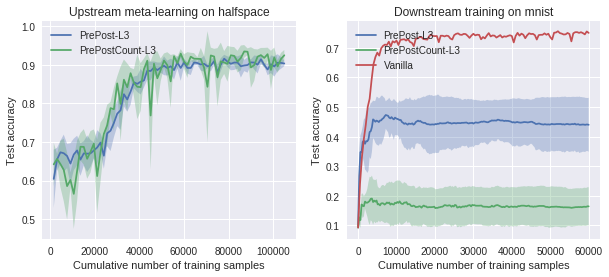

In [15]:
# Plot to compare all.
all_stats_up = [agg_stats_prepost_l3_up,
                agg_stats_prepostcount_l3_up,
                None]
all_stats_down = [agg_stats_prepost_l3_down,
                  agg_stats_prepostcount_l3_down,
                  stats_vanilla]
labels = ['PrePost-L3', 'PrePostCount-L3', 'Vanilla']
plot_compare_models(all_stats_up, all_stats_down, labels,
                    'Upstream meta-learning on ' + dataset_up,
                    'Downstream training on ' + dataset_down,
                    'figs/generalization_bp_all2_' + dataset_up + '_' + dataset_down)